## Установка библиотек

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

## Подготовка данных

In [5]:
train = pd.read_csv('./data/train.csv')
train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [6]:
test = pd.read_csv('./data/test.csv')
test.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,250000.000000,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,874999.500000,4.192987e+02,59.716491,52.192796,1.355852
std,72168.927986,1.668545e+05,22.880028,28.445034,4.274399
min,750000.000000,2.470000e+00,2.490000,0.000000,0.000000
25%,812499.750000,3.578000e+01,39.250000,28.320000,0.000000
50%,874999.500000,6.397000e+01,59.900000,53.360000,1.000000
75%,937499.250000,9.415000e+01,79.390000,76.560000,2.000000
max,999999.000000,7.848626e+07,117.760000,116.820000,2063.000000


In [7]:
train.isnull().sum()
test.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [8]:
# так как у нас есть пробелы в данных
train['Number_of_Ads'].fillna(train['Number_of_Ads'].mean(),inplace = True)
train['Episode_Length_minutes'].fillna(train['Episode_Length_minutes'].mean(),inplace = True)
train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].median(),inplace = True)

In [9]:
# тоже самое и в test 
test['Episode_Length_minutes'].fillna(test['Episode_Length_minutes'].mean(),inplace = True)
test['Guest_Popularity_percentage'].fillna(test['Guest_Popularity_percentage'].median(),inplace = True)

## Визуализания данных

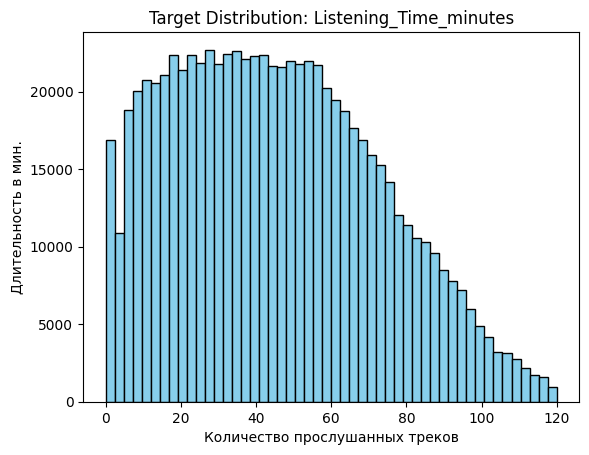

In [10]:
plt.hist(train["Listening_Time_minutes"], bins=50, color="skyblue", edgecolor="black")
plt.title("Target Distribution: Listening_Time_minutes")
plt.xlabel("Количество прослушанных треков")
plt.ylabel("Длительность в мин.")
plt.show()

### Смотрим на корреляцию данных

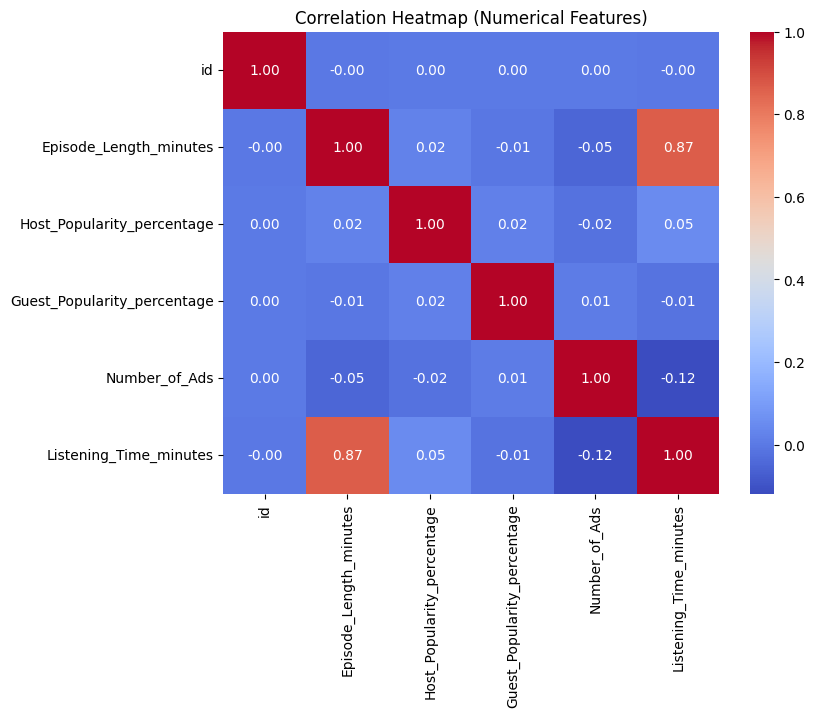

In [11]:
num_cols = train.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(8, 6))
sns.heatmap(train[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## Обчение модели


In [12]:
train_1 = train.drop(columns= ["Episode_Title","Podcast_Name", "id"])
test_1 = test.drop(columns= ["Episode_Title","Podcast_Name", "id"])

In [13]:
train_2 = pd.get_dummies(train_1,columns =['Genre', 'Publication_Day', 'Publication_Time'], drop_first= True,dtype = int)
train_2.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Genre_True Crime,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,64.504738,74.81,53.58,0.0,Positive,31.41998,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,119.800000,66.95,75.95,2.0,Negative,88.01241,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,73.900000,69.97,8.97,0.0,Negative,44.92531,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,67.170000,57.22,78.70,2.0,Positive,46.27824,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,110.510000,80.07,58.68,3.0,Neutral,75.61031,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
test_2 = pd.get_dummies(test_1,columns =['Genre', 'Publication_Day', 'Publication_Time'], drop_first= True,dtype = int)
test_2.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,...,Genre_True Crime,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,78.96,38.11,53.33,1.0,Neutral,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,27.87,71.29,53.36,0.0,Neutral,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,69.10,67.89,97.51,0.0,Positive,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,115.39,23.40,51.75,2.0,Positive,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,72.32,58.10,11.30,2.0,Neutral,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [15]:
label = LabelEncoder()
train_2['Episode_Sentiment'] = label.fit_transform(train_2['Episode_Sentiment'])
test_2['Episode_Sentiment'] = label.fit_transform(test_2['Episode_Sentiment'])

In [16]:
x = train_2.drop(columns = ['Listening_Time_minutes'])
y = train_2['Listening_Time_minutes']

In [17]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
lr = LinearRegression()

lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
x_train_p = lr.predict(X_train)
x_test_p = lr.predict(x_test)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, x_test_p))
print(" Linear Regression RMSE:", rmse)

r2 = r2_score(y_test, x_test_p)
print(" Linear Regression R2 Score :", r2*100,'%')

 Linear Regression RMSE: 13.376327766525247
 Linear Regression R2 Score : 75.73991416738235 %


In [28]:
pred = lr.predict(test_2)

In [29]:
submission_lgbm = pd.DataFrame({'id': test.id, 'Listening_Time_minutes' : pred})
submission_lgbm.to_csv('submission.csv', index=False)

## Используем градиентный бустинг с регрессияй 

In [33]:
# Training Ridge Regression
model = Ridge(alpha=1.0)  # alpha is the regularization strength
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)

In [35]:
gb = GradientBoostingRegressor(random_state=42)

gb.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [36]:
y_pred = gb.predict(x_test)

print("GBR R2:", r2_score(y_test, y_pred))
print("GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

GBR R2: 0.7647142251508132
GBR RMSE: 13.173117660007595


In [37]:
pred_2 = gb.predict(test_2)

In [38]:
submission_lgbm = pd.DataFrame({'id': test.id, 'Listening_Time_minutes' : pred})
submission_lgbm.to_csv('submission.csv', index=False)